In [ ]:
'''
Date: 2022.09.21
Title: 
By: Kang Jin Seong
'''
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-09-22 01:20:15--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-09-22 01:20:15--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-09-22 01:20:15--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
# PCA 클래스 객체를 만들때 n_components 매개변수에 개수를 지정해야한다.
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
# 주성분은 components_속성에 저장
# 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다.
print(pca.components_.shape)

(50, 10000)


In [5]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1):
  n = len(arr) # n은 샘플의 개수
  # 한줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열 개수는 샘플 개수 입니다. 그렇지 않으면 10개입니다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)
  for i in range(rows):
    for j in range(cols):
      if i* 10 + j < n:
        axs[i,j].imshow(arr[i*10+j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

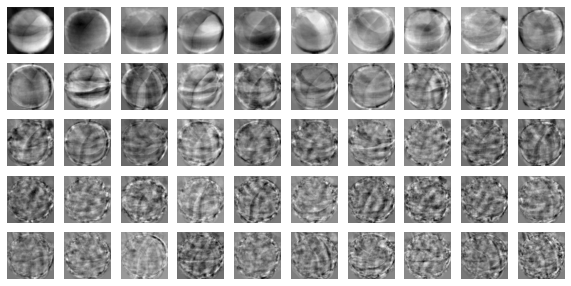

In [7]:
draw_fruits(pca.components_.reshape(-1, 100,100))

In [8]:
# 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄여보자
print(fruits_2d.shape)

(300, 10000)


In [9]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [10]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


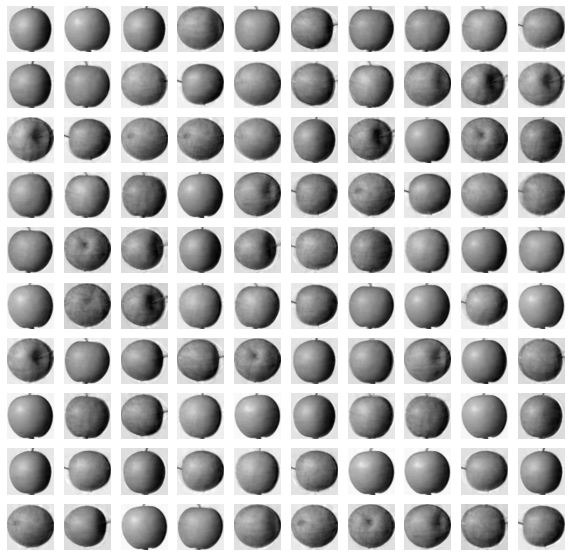

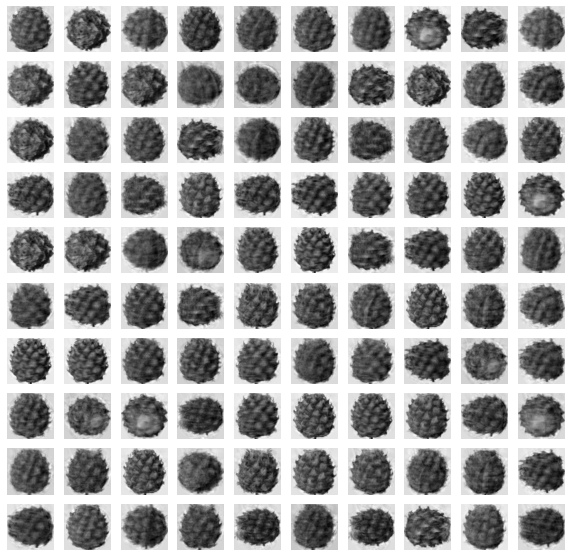

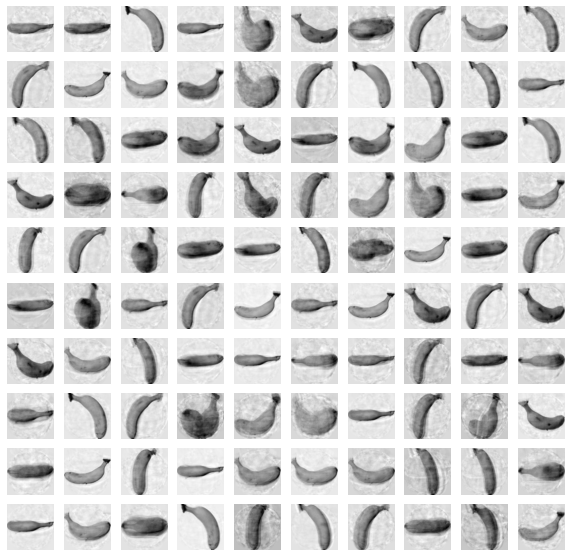

In [12]:
for start in [0, 100, 200]:
  draw_fruits(fruits_inverse[start:start + 100].reshape(-1,100,100))
  print("\n")

In [13]:
# 설명된 분산(explained variance): 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# 각 주성분의 설명된 분산 비율이 기록되어 있다.(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))

0.9215042226637559


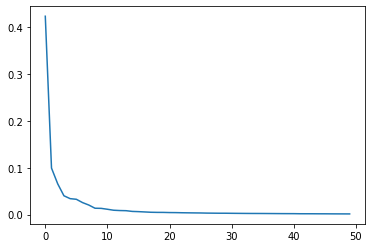

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [15]:
# 차원 축소된 데이터를 사용하여 지도 학습 모델 훈련

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0] * 100 + [1] * 100 + [2] * 100)                

In [17]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.8891239643096924


In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02709369659423828


In [19]:
# PCA 매개변수에 주성분의 개수를 지정했다.
# 이 대신 원하는 설명된 분산의 비율을 입력할 수있다. 분산의 비율에 도달 할 떄 까지 자동으로 주성분을 찾는다.
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [20]:
print(pca.n_components_)

2


In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
'''
2개의 특성을 사용하여 99%의 정확도를 달성했다.
'''

0.99
0.03416433334350586


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


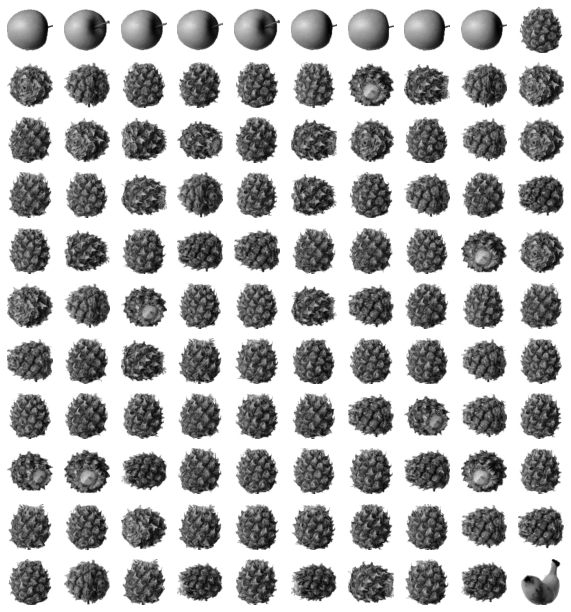

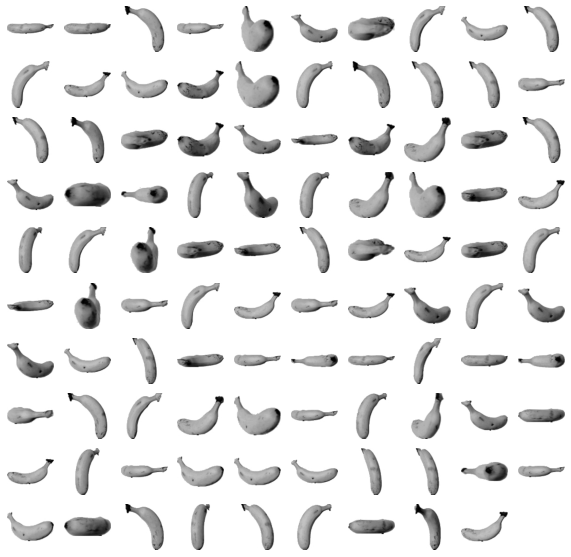

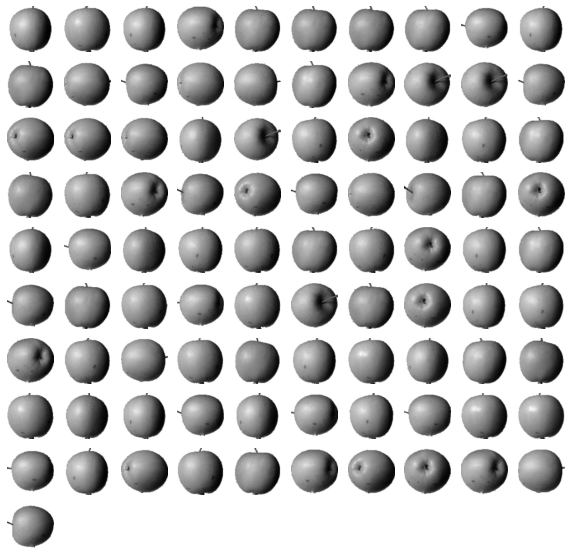

In [27]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

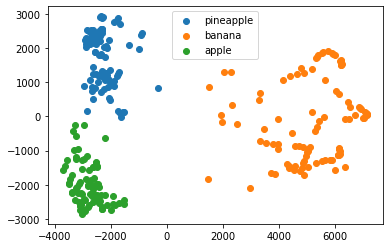

In [30]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana',  'apple'])
plt.show()